In [1]:
import pandas as pd
import numpy as np
import os 
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st



In [2]:
# Read calendar 1 xlsx file
calendar_filename1 = "c://Learn//Project1//Resources//Boston_calendar1.xlsx"
boston_df1 = pd.read_excel(calendar_filename1)
boston_df1.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [3]:
import math
boston_df1.describe()

,listing_id,price
count,5.302870e+05,257677.000000
mean,7.840425e+06,206.934771
std,4.517646e+06,152.749090
min,5.506000e+03,20.000000
25%,4.205641e+06,100.000000
50%,7.920541e+06,170.000000
75%,1.219187e+07,269.000000
max,1.493346e+07,7163.000000


In [4]:
#use dropna
boston_df1 = boston_df1.dropna(how="any")
boston_df1.count()

listing_id    257677
date          257677
available     257677
price         257677
dtype: int64

In [5]:
#read Calendar 2 xlsx file
calendar_file2 = "c://Learn//Project1//Resources//Boston_calendar2.xlsx"
boston_df2 = pd.read_excel(calendar_file2)
boston_df2.head()

,listing_id,date,available,price
0,693353,2016-11-02,t,240.0
1,693353,2016-11-01,t,240.0
2,693353,2016-10-31,t,352.0
3,693353,2016-10-30,t,352.0
4,693353,2016-10-29,t,389.0


In [6]:
#Combined 2 DataFrame
df_final_boston = pd.concat([boston_df1, boston_df2])

df_final_boston.count()

listing_id    775965
date          775965
available     775965
price         514688
dtype: int64

In [7]:
df_final_boston.head()

,listing_id,date,available,price
365,3075044,2017-08-22,t,65.0
366,3075044,2017-08-21,t,65.0
367,3075044,2017-08-20,t,65.0
368,3075044,2017-08-19,t,75.0
369,3075044,2017-08-18,t,75.0


In [8]:
# add year column
df_final_boston['year'] = df_final_boston['date'].dt.year
df_final_boston.head()

,listing_id,date,available,price,year
365,3075044,2017-08-22,t,65.0,2017
366,3075044,2017-08-21,t,65.0,2017
367,3075044,2017-08-20,t,65.0,2017
368,3075044,2017-08-19,t,75.0,2017
369,3075044,2017-08-18,t,75.0,2017


In [9]:
# add Boston under location
df_final_boston['Location'] = 'Boston'
df_final_boston.head()

,listing_id,date,available,price,year,Location
365,3075044,2017-08-22,t,65.0,2017,Boston
366,3075044,2017-08-21,t,65.0,2017,Boston
367,3075044,2017-08-20,t,65.0,2017,Boston
368,3075044,2017-08-19,t,75.0,2017,Boston
369,3075044,2017-08-18,t,75.0,2017,Boston


In [10]:
#Final DF count
df_final_boston.count()

listing_id    775965
date          775965
available     775965
price         514688
year          775965
Location      775965
dtype: int64

In [11]:
# use dropna

df_final_boston= df_final_boston.dropna(how = "any")

In [12]:
df_final_boston.count()

listing_id    514688
date          514688
available     514688
price         514688
year          514688
Location      514688
dtype: int64

In [13]:
#Create month column
df_final_boston['month'] = df_final_boston['date'].dt.month
df_final_boston.month.unique()

array([ 8,  7,  6,  5,  4,  3,  2,  9,  1, 12, 11, 10], dtype=int64)

In [40]:
df_final_boston.tail()

,listing_id,date,available,price,year,Location,month,month_of_year,monthly_avg_price
518280,5844314,2016-11-22,t,58.0,2016,Boston,11,2016-11,NaN
518281,5844314,2016-11-21,t,58.0,2016,Boston,11,2016-11,NaN
518282,5844314,2016-11-20,t,58.0,2016,Boston,11,2016-11,NaN
518286,5844314,2016-11-16,t,59.0,2016,Boston,11,2016-11,NaN
518287,5844314,2016-11-15,t,62.0,2016,Boston,11,2016-11,NaN


In [41]:
# Separate years
df_final_boston ['month_of_year'] = [f"{year}-{month:02d}" for year, month in zip(df_final_boston ['year'], df_final_boston ['month'])  ]
monthly_avg_price = df_final_boston.groupby('month_of_year')['price'].mean()
monthly_avg_price 

month_of_year
2016-09    263.835077
2016-10    245.588173
2016-11    210.592076
2016-12    200.759256
2017-01    190.655499
2017-02    189.188245
2017-03    190.762252
2017-04    207.639646
2017-05    203.883190
2017-06    206.371998
2017-07    213.612579
2017-08    213.736342
2017-09    204.676912
Name: price, dtype: float64

In [36]:
monthly_avg_price.index 

Index(['2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02',
       '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08',
       '2017-09'],
      dtype='object', name='month_of_year')

In [38]:
monthly_avg_price.values

array([263.8350772 , 245.58817346, 210.59207612, 200.75925586,
       190.65549882, 189.1882453 , 190.76225206, 207.63964648,
       203.88319041, 206.37199761, 213.61257885, 213.73634172,
       204.67691238])

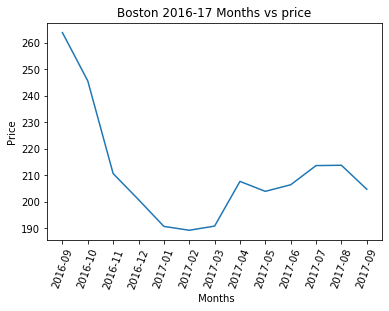

In [52]:
# 2016 Months vs Price

x= monthly_avg_price.index
y = monthly_avg_price.values 

plt.plot(x,y)
#plt.line(df_final_boston.iloc[:,6],[df_final_boston.iloc[:,3]])
plt.xlabel(' Months')
plt.xticks(rotation=70)
plt.ylabel('Price')
plt.title("Boston 2016-17 Months vs price")
plt.savefig('2016-17 months vs price')
plt.show()
